In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from itertools import chain
import squarify as sq
import ipywidgets as widgets
import seaborn as sns 

from IPython.display import clear_output

# Load Datasets

In [2]:
employee = pd.read_csv('employees.csv')

In [3]:
calender_data = pd.read_csv('calendar.csv')

In [4]:
jobs = pd.read_csv('landscaping.csv')

# Visualization 1: Explanatory Visualization

Explore which jobs give more customer satisfaction and which jobs give less customer satisfaction.(Assumption: customer satisfaction < 5 is poor customer satisfaction, and customer satisfaction > 5 is the good customer satisfaction).

In [5]:
jobs= jobs.groupby("job_type").mean().reset_index()

c:\users\swapn\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


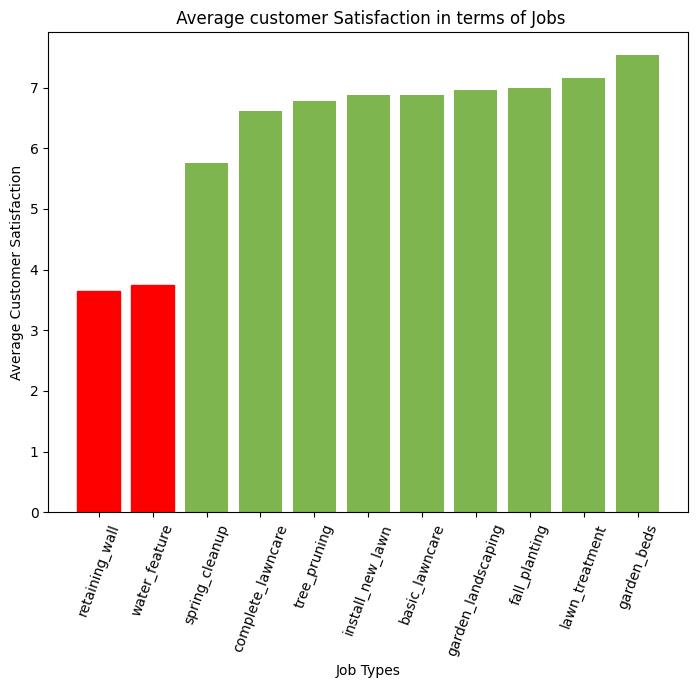

In [6]:
fig = plt.figure(layout="constrained")

ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
c = '#7eb54e'

#Sorting jobs by Customer Satisfaction
jobs = jobs.sort_values(by = ['customer_satisfaction'])

#Bar Plot to show jobs which gives less customer satisfaction
barlist = ax.bar(jobs['job_type'],jobs['customer_satisfaction'], label="customer satisfaction", color = c)
barlist[0].set_color('r')
barlist[1].set_color('r')
plt.xticks(rotation=70)
ax.set_title(" Average customer Satisfaction in terms of Jobs")
ax.set_xlabel('Job Types')
ax.set_ylabel('Average Customer Satisfaction');

# Visualization 2: Interactive Visualization

Exploring whether a long difference between the job request date and job start date is the reason for poor customer satisfaction for the two jobs - Retaining Wall, Water Feature as we have seen in Visualization 1 their average customer satisfaction is less.

# Instructions to run the Interactive Visualization:

Select the Job Type from the Dropdown to see the comparision between the "Time taken to start the job" and "Time taken to complete the job".

In [7]:
landscaping = pd.read_csv('landscaping.csv')

new_df = landscaping[['job_type','request_date','start_date','customer_satisfaction', 'completion_date']].copy()

#Convert dates into datetime format
new_df['request_date'] = pd.to_datetime(new_df['request_date'])
new_df['start_date'] = pd.to_datetime(new_df['start_date'])
new_df['completion_date'] = pd.to_datetime(new_df['completion_date'])

#Calculate difference between job start date and the job request date 
new_df['start_difference'] = new_df['start_date']-new_df['request_date']
new_df1 = new_df[['start_difference','customer_satisfaction']].copy()
new_df1 = new_df1.groupby("start_difference").mean().reset_index()

#Calculate difference between job start date and the job completion date 
new_df['end_difference'] = new_df['completion_date'] - new_df['start_date']
new_df2 = new_df[['job_type','start_difference','end_difference','customer_satisfaction']].copy()
new_df2 = new_df2.groupby(['job_type','start_difference','end_difference']).mean().reset_index()

category='retaining_wall'
performance ='Time to start'

#Dropdown for job Retaining Wall, Water Feature
w = widgets.Dropdown(
    options=['Select','Retaining Wall', 'Water Feature'],
    value='Select',
    description='Job Type:',
)

#onChnage event when we change job type from dropdown
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        if change['new']=='Retaining Wall':
            category ='retaining_wall'
        elif change['new']=='Water Feature':
            category ='water_feature'
        else :
            return
            
        clear_output(wait=True)
        display(w)
        new_df3 = new_df2[(new_df2['job_type'] == category)]
        new_df3['start_difference2'] = new_df3['start_difference'].astype('timedelta64[D]')
        new_df3['end_difference2'] = new_df3['end_difference'].astype('timedelta64[D]')
        new_df3 = new_df3.groupby(['start_difference','end_difference']).mean().reset_index().sort_values(by ='customer_satisfaction')
        new_df3['customer_satisfaction_category'] = np.where(new_df3['customer_satisfaction'] < 5, "Poor", "Good")
        
        fig = plt.figure(constrained_layout=True, figsize=(16, 6))
        gs = fig.add_gridspec(1, 2)
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])


        colors = {'Good': '#4daf4a', 'Poor': '#e41a1c'}
        sns.boxplot(x='start_difference2', y='customer_satisfaction_category', data=new_df3, ax=ax1,  width=0.5, palette=colors)
        sns.boxplot(x='end_difference2', y='customer_satisfaction_category', data=new_df3, ax=ax2,  width=0.5, palette=colors)
        ax1.set_title('Time taken to start the job')
        ax1.set_xlabel('Time in Days')
        ax1.set_ylabel('Customer Satisafction')
        ax2.set_ylabel(None)
        ax2.set_title('Time taken to complete the job')
        ax2.set_xlabel('Time in Days')
        ax2.set_yticks([])
        plt.show()


w.observe(on_change)

display(w);


Dropdown(description='Job Type:', options=('Select', 'Retaining Wall', 'Water Feature'), value='Select')

# Visualization 3: Visualization with Derived Data

Employee Productivity: I am using a Scatter plot to analyze the data on the number of days employees worked, employee wages, and employee productivity which can help the company to identify areas where they can improve employee efficiency and productivity.

c:\users\swapn\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


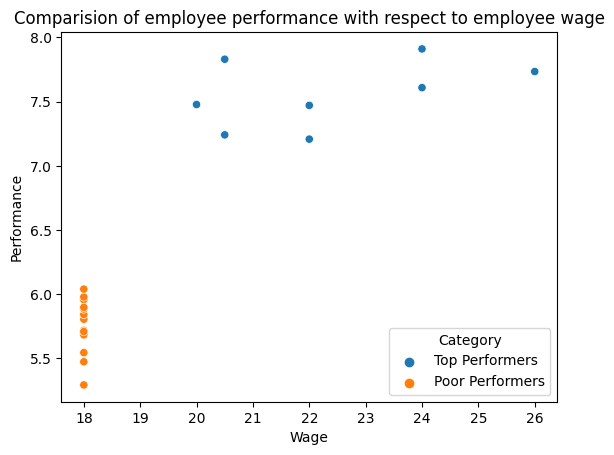

In [8]:
landscaping2 = pd.read_csv('landscaping.csv')
data = {'emp':[], 'jobs':[], 'total_customer_satisfaction':[], 'days':[], 'number_of_jobs':[], 'wage':[]}

#Function to find unique jobs employee worked and to get total customer satisfaction
for emp in employee['employee_id']:
    unique_jobs = set(calender_data[emp].dropna())
    days = len(calender_data[emp].dropna())
    total_customer_satisfaction =0
    for j in unique_jobs:
        cust = (landscaping2[landscaping2['job_id']==j])['customer_satisfaction'].iloc[0]
        total_customer_satisfaction = total_customer_satisfaction + cust
    number_of_jobs = set(calender_data[emp].dropna())   
    number_of_unique_job = len(set(calender_data[emp].dropna()))
    data['emp'].append(emp)
    data['jobs'].append(number_of_unique_job)
    data['total_customer_satisfaction'].append(total_customer_satisfaction)
    data['days'].append(days)
    data['number_of_jobs'].append(number_of_jobs)
    data['wage'].append(employee[employee['employee_id']==emp]['hourly_wage'].iloc[0])
       
    
#Return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

#Creating DataFrame
df2 = pd.DataFrame(data['number_of_jobs'])
df2['emp'] = data['emp']

#Formula to Calcualte Employee Performance and Rate Of Job Completion
df = pd.DataFrame(data)
df['performance']=(df['total_customer_satisfaction']/df['jobs'])
df['Rate_of_job_completion'] = (df['days']/df['jobs'])
df['Category'] = np.where( df['performance']< 6.5, "Poor Performers", "Top Performers")
#print(df)

#Scatter Plot to show Employee Wedges and Employee Performance
g = sns.scatterplot( "wage", "performance", data=df, hue='Category').set(xlabel= 'Wage', ylabel='Performance', title='Comparision of employee performance with respect to employee wage');
#plt.legend(title='Category', loc='lower right', labels=['Top Performers', 'Poor Performers'])
plt.show(g)

# Visualization 4 :- Exploratory Visualization

Plotted a Tree Map for the Employee and number of jobs employee has completed. 

Two Enquiries viewer can make here:
1.	Whether working on most jobs is the reason for poor customer satisfaction as employees are overloaded with work.
2.	Furthermore,  viewer can compare the customer satisfaction between the employees who worked on most jobs and the ones who worked on the least number of jobs to inspect is this a reason for poor customer satisfaction.


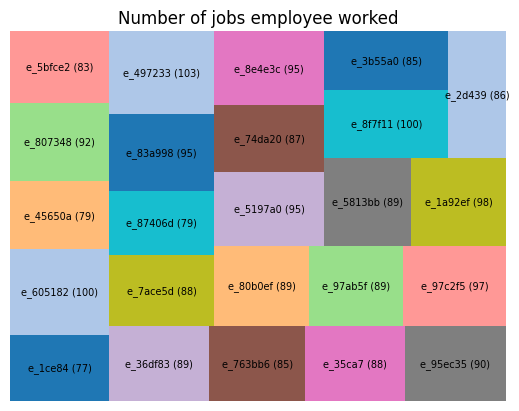

In [9]:
#Combining employee id and number of jobs employee worked to show the label on each square
df["str_jobs"]=df["jobs"].astype(str)
df['names_with_counts'] = df['emp'] +' ('+ df['str_jobs'] +')'

np.random.seed(1)

prep_df = pd.DataFrame({'jobs_count':df['jobs'],
                        'emp_id':df['names_with_counts']})

#Color map for plot
cmap = plt.cm.get_cmap('tab20')
mapped_list = [cmap(i) for i in np.arange(0,1, 1/len(jobs))]

#Plotting Tree Map
norms = sq.normalize_sizes(prep_df['jobs_count'].to_list(),  dx=24, dy=24)
sq.plot(sizes=norms, label=prep_df['emp_id'].to_list(), alpha=1, color=mapped_list, text_kwargs={'fontsize':7})
plt.axis('off')
plt.title("Number of jobs employee worked")
plt.show()
